In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('./datasets/gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


(4.0, 8.0)

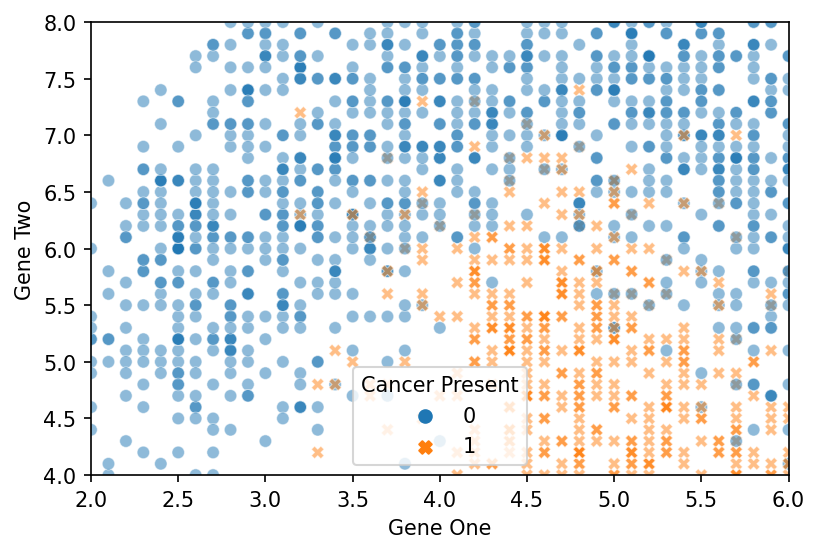

In [9]:
plt.figure(dpi=150)
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.5, style='Cancer Present')
plt.xlim(2,6)
plt.ylim(4,8)

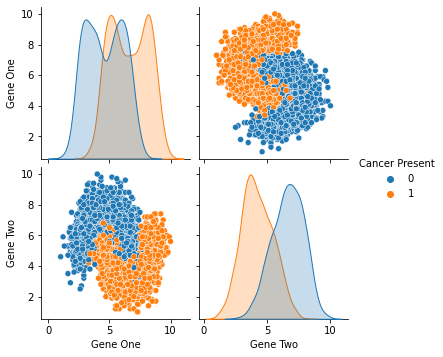

In [10]:
sns.pairplot(data=df, hue='Cancer Present')

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
scaler = StandardScaler()

In [44]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [45]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [46]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
y_pred = knn_model.predict(scaled_X_test)

In [48]:
confusion_matrix(y_test, y_pred)

array([[382,  41],
       [ 31, 446]])

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.92      0.94      0.93       477

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900

